In [1]:
import pandas as pd
import json
import re
import numpy as np

from sklearn.externals import joblib
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
pd.set_option('display.max_columns', 50)

## Cultivate's processed Enron data

In [24]:
path = '/Users/yuwenwu/insight/cultivate/data/processed/'
date_col = ['message__sent_at']
sentences_all_cols = pd.read_csv(path + 'enron_case_study_messages.csv', parse_dates = date_col)

In [4]:
sentences_all_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472230 entries, 0 to 472229
Data columns (total 40 columns):
sentence_index                  472230 non-null int64
sentiment_value                 472230 non-null int64
message__id                     472230 non-null object
message__chat__id               472230 non-null object
message__sent_at                472230 non-null datetime64[ns]
message__contact__parent__id    472230 non-null object
request_prob                    472089 non-null float64
concreteness                    472230 non-null float64
politeness                      416681 non-null float64
is_question                     472230 non-null bool
message__provider_guid          472230 non-null int64
message__chat__team__id         472230 non-null object
msg_size_x                      472230 non-null int64
advs                            472230 non-null int64
articles                        472230 non-null int64
aux_verbs                       472230 non-null int64
convo_i

In [26]:
sentences_all_cols.head()

,sentence_index,sentiment_value,message__id,message__chat__id,message__sent_at,message__contact__parent__id,request_prob,concreteness,politeness,is_question,message__provider_guid,message__chat__team__id,msg_size_x,advs,articles,aux_verbs,convo_index,convo_size,da_label,da_prob,imp_prons,msg_size_y,non_stop_word_lemmas,num_female,num_female_pronouns,num_male,num_male_pronouns,num_subordinate,num_superior,num_unique_tokens,num_unknowngender,num_unknownpower,parent_id,parent_prob,per_prons,preps,quants,response_time,sender_gender,sub_conjs
0,3,1,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,3,westdesk#parsing#california#file#schedules#sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,NaN,I,0
1,2,2,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.229237,4.465000,0.433185,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Conventional,0.345797,0,3,message#log,0,0,5,0,0,0,2,6,11,NaN,NaN,0,0,0,NaN,I,0
2,1,2,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.148573,2.160000,0.399924,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.309767,0,3,variance#detect,0,0,5,0,0,0,3,6,11,NaN,NaN,0,0,0,NaN,I,0
3,0,1,5kT1sN1BY08ZfoTYcUHo_Q,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.047411,3.296667,0.389760,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.357122,0,3,ancillary#hour#schedule#hourahead#award#start#...,0,0,5,0,0,0,11,6,11,NaN,NaN,0,0,0,NaN,I,0
4,3,1,5NLpNTSV2Ui1EZdCWFTbAg,0EUsnl18IABPqYfgDRHaoA,2001-10-06 07:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,724694,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,3,westdesk#parsing#california#file#schedules#sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,NaN,I,0


In [44]:
sentences = sentences_all_cols.copy()

In [45]:
sentences.drop(['message__id', 'response_time', 'msg_size_y'], axis = 1, inplace = True)
cols = ['sent_index', 'sentiment', 'chat_id', 'timestamp',
       'sender_id', 'request_prob', 'concrete', 'polite_prob',
       'question', 'msg_id', 'team_id', 'msg_size', 'adv',
       'articles', 'aux_verbs', 'convo_index', 'convo_size',
       'da_label', 'da_prob', 'imp_prons', 
       'vocab', 'female_recipients', 'female_prons',
       'male_recipients', 'male_prons', 'subordinates',
       'superiors', 'unique_tokens', 'gender_unknown',
       'power_unknown', 'parent_predict', 'parent_prob',
       'per_prons', 'preps', 'quants', 'sender_gender', 'sub_conjs']
sentences.columns = cols
sentences.head()

,sent_index,sentiment,chat_id,timestamp,sender_id,request_prob,concrete,polite_prob,question,msg_id,team_id,msg_size,adv,articles,aux_verbs,convo_index,convo_size,da_label,da_prob,imp_prons,vocab,female_recipients,female_prons,male_recipients,male_prons,subordinates,superiors,unique_tokens,gender_unknown,power_unknown,parent_predict,parent_prob,per_prons,preps,quants,sender_gender,sub_conjs
0,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,westdesk#parsing#california#file#schedules#sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,I,0
1,2,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.229237,4.465000,0.433185,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Conventional,0.345797,0,message#log,0,0,5,0,0,0,2,6,11,NaN,NaN,0,0,0,I,0
2,1,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.148573,2.160000,0.399924,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.309767,0,variance#detect,0,0,5,0,0,0,3,6,11,NaN,NaN,0,0,0,I,0
3,0,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.047411,3.296667,0.389760,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.357122,0,ancillary#hour#schedule#hourahead#award#start#...,0,0,5,0,0,0,11,6,11,NaN,NaN,0,0,0,I,0
4,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-06 07:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,724694,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,westdesk#parsing#california#file#schedules#sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,I,0


### Re-name sender and chat IDs

In [ ]:
chat_ids = {}
sender_ids = {}

### Parse sentence text data

In [47]:
vocab = []
for words in sentences['vocab']:
    if type(words) == float:
        vocab.append(np.nan)
    else:
        word_list = words.split('#')
        vocab.append(' '.join(word_list))

In [48]:
sentences['vocab'] = vocab
sentences.head()

,sent_index,sentiment,chat_id,timestamp,sender_id,request_prob,concrete,polite_prob,question,msg_id,team_id,msg_size,adv,articles,aux_verbs,convo_index,convo_size,da_label,da_prob,imp_prons,vocab,female_recipients,female_prons,male_recipients,male_prons,subordinates,superiors,unique_tokens,gender_unknown,power_unknown,parent_predict,parent_prob,per_prons,preps,quants,sender_gender,sub_conjs
0,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,westdesk parsing california file schedules sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,I,0
1,2,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.229237,4.465000,0.433185,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Conventional,0.345797,0,message log,0,0,5,0,0,0,2,6,11,NaN,NaN,0,0,0,I,0
2,1,2,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.148573,2.160000,0.399924,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.309767,0,variance detect,0,0,5,0,0,0,3,6,11,NaN,NaN,0,0,0,I,0
3,0,1,0EUsnl18IABPqYfgDRHaoA,2001-10-05 02:38:26,bM1QDebT6vOFy4ifK_OcGA,0.047411,3.296667,0.389760,False,723973,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.357122,0,ancillary hour schedule hourahead award start ...,0,0,5,0,0,0,11,6,11,NaN,NaN,0,0,0,I,0
4,3,1,0EUsnl18IABPqYfgDRHaoA,2001-10-06 07:38:26,bM1QDebT6vOFy4ifK_OcGA,0.154175,3.980000,0.447116,False,724694,XZwXgkxlOGssBijnWEMOig,3,0,0,0,0,1,Inform,0.269913,0,westdesk parsing california file schedules sch...,0,0,5,0,0,0,16,6,11,NaN,NaN,0,0,0,I,0


In [63]:
null_vocab = sentences['vocab'].isnull().sum()
print('There are {0} null vocab entries, which constitutes {1:.02f} of the total sentences.'\
     .format(null_vocab, null_vocab / len(sentences)))

There are 29716 null vocab entries, which constitutes 0.06 of the total sentences.


In [66]:
docs = []
msg_ids = sentences['msg_id'].tolist()
words = sentences['vocab'].tolist()
prev_doc_id = sentences['msg_id'][0]
doc_words = ''
for i in range(len(sentences)):
    current_doc_id = msg_ids[i]
    current_doc_words = words[i]
    if type(current_doc_words) == float:
        continue
    elif current_doc_id == prev_doc_id:
        doc_words = ' '.join([doc_words, current_doc_words])
    else:
        docs.append(doc_words)
        doc_words = current_doc_words
        prev_doc_id = current_doc_id

In [71]:
len(docs)
sentences['msg_id'].nunique()

67910

68752

In [73]:
docs[20:30]

['westdesk parsing california file schedules scheduling iso portland final message log variance detect hour schedule hourahead award start ancillary date',
 'westdesk parsing california file schedules scheduling iso portland final message log load variance detect schedule variance detect hour hourahead schedule award start ancillary date',
 'westdesk parsing california file schedules scheduling iso portland final message log variance detect hour schedule hourahead award start ancillary date',
 'westdesk parsing california file schedules scheduling iso portland final message log variance detect hour schedule hourahead award start ancillary date',
 'westdesk parsing california file schedules scheduling iso portland final message log generation variance detect schedule variance detect hour schedule hourahead award start ancillary date',
 'westdesk parsing california file schedules scheduling iso portland final message log import/export energy detect schedule variance variance detect ancil

In [25]:
s = sentences_all_cols['non_stop_word_lemmas'].str.contains('westdesk parsing california file \
schedules scheduling iso portland final message log variance detect \
hour schedule hourahead award start ancillary date').count()

s
s / len(sentences_all_cols)
len(sentences_all_cols)

442514

0.93707303644410567

472230

### Per message analysis
Within a message, how much variation is there in sentiment, etc?

In [24]:
messages = sentences.groupby('msg_id')

In [17]:
cols_calc = ['sentiment', 'request_prob', 'concrete', 'polite_prob', 'adv', 'articles', 'aux_verbs', 'imp_prons',
             'female_recipients', 'female_prons', 'male_recipients', 'male_prons', 'subordinates', 'superiors',
             'unique_tokens', 'gender_unknown', 'power_unknown', 'per_prons', 'preps', 'quants', 'sub_conjs']

msg_id = messages['sentiment'].mean().index
message_means = pd.DataFrame(msg_id, columns = ['msg_id'])
message_stds = message_means.copy()
for col in cols_calc:
    message_means[col] = messages[col].mean().tolist()
    message_stds[col] = messages[col].std().tolist()

#per_message['sentiment'].mean()
#also want num questions per sentence

In [18]:
sentences['msg_id'].nunique()
len(message_means)

68752

68752

## Raw Enron email data

In [3]:
with open('enron.mbox.json', 'r') as json_data:
    emails = json.load(json_data)

Retrieve just the body of the email to clean the text.

In [30]:
email_content = []
for i in range(len(emails)):
    content = emails[i]['parts'][0]['content']
    email_content.append(content)

#clean strings
for i in range(len(email_content)):
    email_content[i] = email_content[i].replace('\n', ' ')
    email_content[i] = email_content[i].replace('\t', ' ')
    email_content[i] = re.sub('--+', '', email_content[i])
    email_content[i] = re.sub(' +', ' ', email_content[i])
    email_content[i] = re.sub('[0-9]+/[0-9]+/[0-9]+ ([0-9]+:[0-9]+)* [a-zA-Z]{2}', '', email_content[i])
    email_content[i] = re.sub('@([a-zA-Z])*', '', email_content[i])
    email_content[i] = re.sub('/[a-zA-Z]*/[a-zA-Z]*', '', email_content[i])
    email_content[i] = email_content[i].strip()

### Processing text

In [34]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import spacy

Extract features from raw text.

In [32]:
nlp = spacy.load('en')

In [35]:
caps = []
total_msg_lens = []
periods, commas = [], []
ex_marks, q_marks = [], []
forwarded = []
word_tokens = []
pos = []
for email in email_content:
    caps.append(sum(1 for s in email if s.isupper()))
    total_msg_lens.append(len(email))
    periods.append(sum(1 for s in email if s == '.'))
    commas.append(sum(1 for s in email if s == ','))
    ex_marks.append(sum(1 for s in email if s == '!'))
    q_marks.append(sum(1 for s in email if s == '?'))
    if 'Forwarded' in email:
        forwarded.append(True)
    else:
        forwarded.append(False)
    #email = email.lower()
    pos.append(nlp(email))
    word_tokens.append(word_tokenize(email))

In [37]:
joblib.dump(email_content, 'email_content.pkl');
#email_content = joblib.load('email_content.pkl')

In [442]:
punct = string.punctuation
word_counts = []
for i in range(len(word_tokens)):
    words = [w for w in word_tokens[i] if not w in punct]
    word_counts.append(len(words))

Stop word removal may eliminate important words in the context of the email. First try without stop word removal.

In [93]:
#stopwords = nltk.corpus.stopwords.words('english')
#for i in range(len(word_tokens)):
 #   word_tokens[i] = [w for w in word_tokens[i] if not w in stopwords]

In [354]:
#joblib.dump(word_tokens, 'word_tokens.pkl')
word_tokens = joblib.load('word_tokens.pkl')

In [8]:
text_features = pd.DataFrame(
    {
        'caps':caps,
        'msg_len':total_msg_lens,
        'periods':periods,
        'commas':commas,
        'ex_marks':ex_marks,
        'q_marks':q_marks,
        'forwarded':forwarded,
        'word_count':word_counts
    }
)

In [275]:
text_features.head(10)

,caps,commas,ex_marks,forwarded,msg_len,periods,q_marks,word_count
0,1,0,0,False,20,0,0,4
1,12,1,0,False,773,10,0,140
2,0,0,3,False,29,1,0,5
3,6,1,0,False,180,2,0,34
4,2,0,0,False,33,1,0,7
5,5,1,0,False,56,0,1,9
6,16,0,0,False,219,4,0,30
7,0,0,0,False,32,0,0,6
8,15,0,0,False,198,15,0,32
9,81,17,2,True,1926,17,0,299


In [54]:
#joblib.dump(text_features, 'text_features.pkl');
text_features = joblib.load('text_features.pkl')

## Gensim

In [22]:
import gensim
from gensim import corpora

In [38]:
text = []
for token in word_tokens:
    text.append(' '.join(token))

In [44]:
def transform_texts(texts):
    docs = []
    for doc in nlp.pipe(texts, n_threads = 4):
        
        # Iterate over base NPs, e.g. "all their good ideas"
        tokens = []
        for np_ in list(doc.noun_chunks):
            
            # Only keep adjectives and nouns, e.g. "good ideas"
            nps = []
            try:
                while len(np_) >= 1 and np_[0].dep_ in ('amod', 'compound'):
                    np_ = np_[1:]
                if len(np_) >= 1:
                    # Merge the tokens, e.g. good_ideas
                    nps.append(np_.merge(np_.root.tag_, np_.text, np_.root.ent_type_))
            except IndexError:
                pass
            # Iterate over named entities
            ents = []
            for ent in doc.ents:
                if len(ent) > 1:
                    # Merge them into single tokens
                    ents.append(ent.merge(ent.root.tag_, ent.text, ent.label_))
            
            token_strings = []
            for np_ in nps:
                text = np_.text.replace(' ', '_')
                tag = np_.ent_type_ or np_.tag_
                token_strings.append('{}|{}'.format(text, tag))
                tokens.append(' '.join(token_strings))
                tokens = list(set(tokens))
        
        if not tokens:
            docs.append([])
        else:
            docs.append(tokens)
    return docs

In [45]:
%time docs_capitalized_punct = transform_texts(text)
pickle.dump(docs_capitalized_punct, open('docs_capitalized_punct.p', 'wb'))

CPU times: user 11min 13s, sys: 4.94 s, total: 11min 18s
Wall time: 11min 37s


In [610]:
to_remove = ['PRP', 'WP', 'PERSON']
docs_filtered = []
for doc in docs_capitalized_punct:
    if not doc:
        continue
    term_list = []
    for term in doc:
        if not any(s in term for s in to_remove):
            term_list.append(term)
    docs_filtered.append(term_list)
#pickle.dump(docs_filtered, open('docs_capitalized_punct_filtered.p', 'wb'))

In [14]:
docs_filtered = pickle.load(open('docs_capitalized_punct_filtered.p', 'rb'))

In [511]:
ldamodel_cap_punct_filtered.print_topics(num_topics = num_topics, num_words = 5)

[(0,
  '0.013*"activities|NNS" + 0.012*"e|NN" + 0.011*"Brent|ORG" + 0.011*"regard|NN" + 0.010*"Thanks|NNS"'),
 (1,
  '0.010*"Subject|NN" + 0.007*"I_\'m|NN" + 0.006*"Dallas|GPE" + 0.006*"the_tickets|NNS" + 0.006*"the_detail|NN"'),
 (2,
  '0.017*"Calgary|GPE" + 0.011*"the_rest|NN" + 0.009*"a_lot|NN" + 0.009*"Portland|GPE" + 0.009*"your_input|NN"'),
 (3,
  '0.063*"http|NN" + 0.025*"this_request|NN" + 0.021*"Name|NN" + 0.016*"ID|NN" + 0.015*"this_email|NN"'),
 (4,
  '0.016*"offices|NNS" + 0.016*"http|NN" + 0.012*"Director|NNP" + 0.010*">|NNP" + 0.009*"night|TIME"'),
 (5,
  '0.009*"operations|NNS" + 0.008*"London|GPE" + 0.007*"the_location|NN" + 0.006*"consistency|NN" + 0.006*"knowledge|NN"'),
 (6,
  '0.011*"the_one|NN" + 0.009*"Thanks|NNS" + 0.009*"discussion|NN" + 0.008*"my_cell_phone|NN" + 0.008*"the_top|NN"'),
 (7,
  '0.010*"message|NN" + 0.006*"gas|NN" + 0.006*"June|DATE" + 0.005*"nobody|NN" + 0.005*"Subject|NN"'),
 (8,
  '0.017*"Thanks|NNS" + 0.007*"To|NNP" + 0.007*"personnel|NNS" + 0

In [11]:
#this model was trained on corpus where nouns were forced to lowercase and punctuation was removed; seems to perform pretty well
#if use this one need to re-save raw data
#pickle.dump(ldamodel, open('ldamodel_nocap_nopunct.p', 'wb'))
#ldamodel.print_topics(num_topics=num_topics, num_words=5)

Investigate distribution of terms to remove most common and most frequent ones.

In [15]:
vocab = [item for sublist in docs_filtered for item in sublist]
len(vocab), len(list(set(vocab)))

(335027, 99412)

In [16]:
from collections import defaultdict
d = defaultdict(int)
for word in vocab:
    d[word] += 1

In [560]:
df = pd.DataFrame([d])
df = df.T
df = df.drop(df[0].idxmax())
df.max()

0    2245
dtype: int64

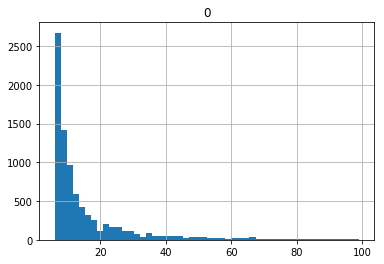

In [566]:
df2 = df[(df[0] > 5) & (df[0] < 100)]
df2.hist(bins = 50);

In [17]:
terms_to_keep = []
for k, v in d.items():
    if v > 5 and v < 100:
        terms_to_keep.append(k)

len(terms_to_keep)

8432

In [18]:
terms_to_keep = {key: None for key in terms_to_keep}

Filter documents by terms that appeared at least 5 times but fewer than 100 times.

In [19]:
docs_common_terms = []
empty_indices_common = []
for idx, doc in enumerate(docs_filtered):
    term_list = []
    for term in doc:
        if term in terms_to_keep:
            term_list.append(term)
    if not term_list:
        empty_indices_common.append(idx)
    else:
        docs_common_terms.append(term_list)

In [20]:
#pickle.dump(docs_common_terms, open('docs_common_terms.p', 'wb'))

In [23]:
dictionary = corpora.Dictionary(docs_common_terms)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs_common_terms]

In [618]:
num_topics = 50
lda = gensim.models.ldamodel.LdaModel
%time ldamodel_common = lda(doc_term_matrix, num_topics = num_topics, id2word = dictionary, passes = 50)
#pickle.dump(ldamodel_common, open('ldamodel_common.p', 'wb'))
ldamodel_common = pickle.load(open('ldamodel_common.p', 'rb'))

CPU times: user 6min 31s, sys: 2.66 s, total: 6min 34s
Wall time: 6min 40s


In [13]:
ldamodel_common.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.041*"next_week|DATE" + 0.035*"your_support|NN" + 0.033*"this_meeting|NN" + 0.023*"Please_click_http|NN" + 0.023*"form|NN"'),
 (1,
  '0.043*"SAP|ORG" + 0.025*"these_deals|NNS" + 0.024*"contacts|NNS" + 0.023*"staff|NN" + 0.018*"an_update|NN"'),
 (2,
  '0.052*"your_promotion|NN" + 0.049*"Director|NNP" + 0.036*"availability|NN" + 0.030*"directors|NNS" + 0.029*"the_web|NN"'),
 (3,
  '0.047*"messages|NNS" + 0.032*"March|DATE" + 0.029*"the_students|NNS" + 0.025*"these_reports|NNS" + 0.025*"an_effort|NN"'),
 (4,
  '0.021*"requests|NNS" + 0.021*"the_memo|NN" + 0.021*"response|NN" + 0.021*"a_draft|NN" + 0.019*"entities|NNS"'),
 (5,
  '0.014*"practice|NN" + 0.013*"the_season|NN" + 0.011*"Global_Products|ORG" + 0.009*"a_presentation|NN" + 0.009*"noon|TIME"'),
 (6,
  '0.034*"discussion|NN" + 0.026*"the_case|NN" + 0.020*"the_end|NN" + 0.018*"that_meeting|NN" + 0.017*"an_opportunity|NN"'),
 (7,
  '0.037*"your_review|NN" + 0.037*"your_name|NN" + 0.034*"RAC|ORG" + 0.033*"school|NN" + 0.030*"g

In [24]:
topic_assignments = ldamodel_common[doc_term_matrix]

In [43]:
pickle.dump(topic_assignments, open('topic_assignments_intermediate.p', 'wb'))

In [25]:
topics = []
probas = []
for doc in topic_assignments:
    topic, proba = max(doc, key = lambda x:x[1])
    topics.append(topic)
    probas.append(proba)

In [48]:
#get empty indices
empty = []
for idx, doc in enumerate(docs_capitalized_punct):
    if not doc:
        empty.append(idx)
        continue
    term_list = []
    tmp = []
    for term in doc:
        if term in terms_to_keep:
            tmp.append(term)
    for term in tmp:
        if not any(s in term for s in to_remove):
            term_list.append(term)
    if not term_list:
        empty.append(idx)

In [49]:
len(empty) + len(topics)

12017

In [50]:
empty = {key:None for key in empty}

In [51]:
pickle.dump(empty, open('empty_indices.p', 'wb'))

In [52]:
l = [None] * len(email_content)
for i in range(len(l)):
    if i in empty:
        l[i] = 'nan'

In [61]:
l2 = l.copy()
index = 0
for i in range(len(l)):
    if l[i] == None:
        l[i] = topics[index]
        l2[i] = probas[index]
        index += 1

In [62]:
text_features['topic'] = l
text_features['proba'] = l2
text_features.replace('nan', np.nan, inplace = True)

In [65]:
text_features.head()

,caps,commas,ex_marks,forwarded,msg_len,periods,q_marks,word_count,topic,proba
0,1,0,0,False,20,0,0,4,NaN,NaN
1,12,1,0,False,773,10,0,140,14.0,0.287143
2,0,0,3,False,29,1,0,5,NaN,NaN
3,6,1,0,False,180,2,0,34,10.0,0.336667
4,2,0,0,False,33,1,0,7,NaN,NaN


Engineer POS features.

In [76]:
pos_counts = []
for doc in pos:
    d = defaultdict(int)
    for word in doc:
        d[word.pos_] +=1
    pos_counts.append(d)

In [79]:
pickle.dump(pos_counts, open('pos_counts.p', 'wb'))

In [85]:
df_pos_counts = pd.DataFrame(pos_counts)
df_pos_counts.columns = df_pos_counts.columns.str.lower()
df_pos_counts.replace(np.nan, 0, inplace = True)
df_pos_counts.head()

,adj,adp,adv,cconj,det,intj,noun,num,part,pron,propn,punct,space,sym,verb,x
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10.0,13.0,15.0,7.0,16.0,0.0,35.0,0.0,5.0,5.0,1.0,11.0,0.0,0.0,33.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
3,2.0,5.0,0.0,2.0,4.0,0.0,9.0,0.0,1.0,2.0,4.0,5.0,0.0,0.0,5.0,0.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0


In [88]:
text_features = pd.concat([text_features, df_pos_counts], axis = 1)
text_features.head()

,caps,commas,ex_marks,forwarded,msg_len,periods,q_marks,word_count,topic,proba,adj,adp,adv,cconj,det,intj,noun,num,part,pron,propn,punct,space,sym,verb,x
0,1,0,0,False,20,0,0,4,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,12,1,0,False,773,10,0,140,14.0,0.287143,10.0,13.0,15.0,7.0,16.0,0.0,35.0,0.0,5.0,5.0,1.0,11.0,0.0,0.0,33.0,0.0
2,0,0,3,False,29,1,0,5,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
3,6,1,0,False,180,2,0,34,10.0,0.336667,2.0,5.0,0.0,2.0,4.0,0.0,9.0,0.0,1.0,2.0,4.0,5.0,0.0,0.0,5.0,0.0
4,2,0,0,False,33,1,0,7,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0


### Process for LDA, sentiment analysis

We used Gensim, and trained the model using the Skip-Gram with Negative Sampling algorithm, using a frequency threshold of 10 and 5 iterations. After training, we applied a further frequency threshold of 50, to reduce the run-time memory requirements (see [here](https://explosion.ai/blog/sense2vec-with-spacy)).

## Identifying pairs

* How often did the pair communicate (how many messages)? Could eventually ask how many were new conversations vs. old, man not matter
* Timestamp of communication

In [307]:
received_from = {}
for email in emails:
    key = email['From']
    if 'To' not in email:
        received_from[key] = []
    elif key in received_from:
        received_from[key].append(email['To'])
    else:
        received_from[key] = [email['To']]

for k, v in received_from.items():
    received_from[k] = [item for sublist in v for item in sublist]

In [300]:
sent_to = {}
for email in emails:
    if 'To' in email:
        keys = email['To']
        for key in keys:
            if key in sent_to:
                sent_to[key].append(email['From'])
            else:
                sent_to[key] = [email['From']]

In [313]:
philip_allen = emails[0]['From']
#received_from[philip_allen]
sent_to[philip_allen]

['tim.belden@enron.com',
 'tiffany.miller@enron.com',
 'christi.nicolay@enron.com',
 'kim.ward@enron.com',
 'frank.hayden@enron.com',
 'tim.heizenrader@enron.com',
 'paul.kaufman@enron.com',
 'rebecca.cantrell@enron.com',
 'rebecca.cantrell@enron.com',
 'sarah.novosel@enron.com',
 'philip.polsky@enron.com',
 'lisa.jacobson@enron.com',
 'alyse.herasimchuk@enron.com',
 'john.arnold@enron.com',
 'john.arnold@enron.com',
 'ina.rangel@enron.com',
 'kenny.soignet@enron.com',
 'john.arnold@enron.com',
 'john.lavorato@enron.com',
 'john.arnold@enron.com',
 'david.forster@enron.com',
 'kenny.ha@enron.com',
 'william.kasemervisz@enron.com',
 'kimberly.brown@enron.com',
 'kenny.ha@enron.com',
 'john.lavorato@enron.com',
 'cheryl.kuehl@enron.com',
 'ted.bland@enron.com',
 'beverly.stephens@enron.com',
 'david.delainey@enron.com',
 'kay.chapman@enron.com',
 'kay.chapman@enron.com',
 'nicki.daw@enron.com',
 'brenda.whitehead@enron.com',
 'janette.elbertson@enron.com',
 'john.lavorato@enron.com',
 't

### Plan of attack

**Identify pairs**

* First get sender/receiver pairs from To/From fields
* Build a graph? Visualize it?

**Features to identify relationships**

* Stylistic
    * Count number of punctuations in each message, then remove them. First remove extraneous punctuation?
    * Count # capitalizations vs no capitalization and then coerce to lowercase?
    * POS?
* Speed of responses and/or number of independent communication threads
* Semantic (based on sentence, averaged over message)
* Topic? Use LDA